In [ ]:
import pandas as pd
import rdkit
from rdkit import DataStructs, Chem
from rdkit.Chem import MACCSkeys, Draw
import torch
import os


In [2]:
from fast_molvae.sample import load_model
model = load_model('./data/vocab.txt', './fast_molvae/vae_model/model.epoch-19')

D:\Anaconda3\envs\python36\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [3]:
resultFile = os.path.join('D:\Study\CIS\CancerML\mlps_drug_exp\\results',
                          'LNIC50_dLatentVec_HCC1187.txt')
df = pd.read_csv(open(resultFile), sep='\t')

In [4]:
smiles = []

for i in range(df.shape[0]):
    z1 = torch.FloatTensor([list(df.loc[i])[2: 30]]).cuda()
    z2 = torch.FloatTensor([list(df.loc[i])[30: ]]).cuda()
    smiles.append(model.decode(z1, z2, False))
    
    
    

D:\Anaconda3\envs\python36\lib\site-packages\torch\nn\functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
D:\Anaconda3\envs\python36\lib\site-packages\torch\nn\functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [5]:
responses = []
for i in range(df.shape[0]):
    response = list(df.loc[i])[1]
    responses.append(str(response))

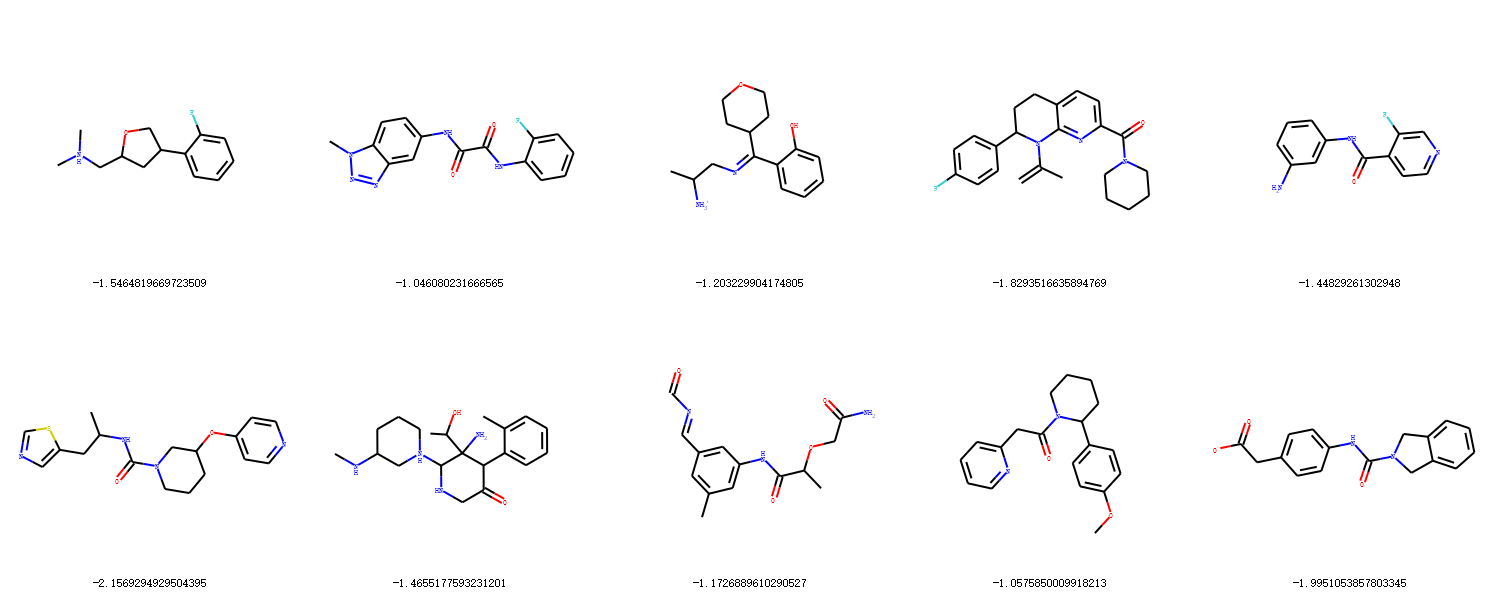

In [6]:
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=3,subImgSize=(500, 500), legends=responses)
img